In [1]:
import pandas as pd
import numpy as np
import json
import glob

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
mpl.rcParams["font.size"] = 20

import statsmodels.stats.anova as anova
from  scipy.stats import chi2_contingency
import statsmodels.api as sm
import scipy.stats as st
from statsmodels.formula.api import ols
from scipy import stats

import warnings
warnings.filterwarnings("ignore")

# 1.加载数据

In [2]:
# 合并json文件存储为表格
# path = glob.glob(r'E:\data\NLP')


name = []   #作者姓名
year = []   #年份
mv = []   #M_value
ev = []   #E_value
ev_ = []   #作者顺序
df = pd.DataFrame()  #合并文件

# 读取每个文件
for i in range(0,380000,20000):
#     E:\data\NLP\NLP_100000.json
#文件读取路径
    file = f'E:\\data\\NLP\\NLP_{i}.json'
    print(file)
    data = json.load(open(file,'r'))
    for key in data.keys():
        author = data[key]
        item = author[0]
        
        cnt = 1
        for i in item['authors']:
            name.append(i['name'])
            year.append(item['year'])
            mv.append(item['M_value'])
            ev.append(item['E_value'])
            ev_.append(cnt)
            cnt += 1
    
# 存储新文件
df['name'] = name
df['year'] = year
df['M_value'] = mv
df['E_value1'] = ev
df['E_value2'] = ev_
df.to_csv(r'E:\data\result_new.csv', index=0)
print("finish")

E:\data\NLP\NLP_0.json
E:\data\NLP\NLP_20000.json
E:\data\NLP\NLP_40000.json
E:\data\NLP\NLP_60000.json
E:\data\NLP\NLP_80000.json
E:\data\NLP\NLP_100000.json
E:\data\NLP\NLP_120000.json
E:\data\NLP\NLP_140000.json
E:\data\NLP\NLP_160000.json
E:\data\NLP\NLP_180000.json
E:\data\NLP\NLP_200000.json
E:\data\NLP\NLP_220000.json
E:\data\NLP\NLP_240000.json
E:\data\NLP\NLP_260000.json
E:\data\NLP\NLP_280000.json
E:\data\NLP\NLP_300000.json
E:\data\NLP\NLP_320000.json
E:\data\NLP\NLP_340000.json
E:\data\NLP\NLP_360000.json
finish


In [3]:
# 分组后的文件
data_new = pd.read_csv(r'E:\data\result_new.csv')

# 每个作者的学术年龄，取age>=6
name = data_new.groupby('name')['year'].agg(['min','max'])
name['age'] = name['max'] - name['min']+1
name = name[name['age']>=6]
data_new = data_new.merge(name, how='left', left_on='name', right_on=name.index)
data_new = data_new.dropna(axis = 0, subset = ['age'])

# Group1:学术年龄，Group2:学术生涯
data_new['gap'] = data_new['year'] - data_new['min'] + 1
data_new['group1'] = data_new.apply(lambda x: x['age']//5 if x['age']%5 != 0 else x['age']//5-1, axis=1)
data_new['group2'] = data_new.apply(lambda x: x['gap']//5+1 if x['gap']%5 != 0 else x['gap']//5, axis=1)

In [4]:
# min:该作者最小年份
# max:该作者最大年份
# age:该作者学术年龄
# gap:当前文章聚该作者最小年份的间隔
data_new.describe()

,year,M_value,E_value1,E_value2,min,max,age,gap,group1,group2
count,118101.000000,118101.000000,118101.000000,118101.000000,118101.000000,118101.000000,118101.000000,118101.000000,118101.000000,118101.000000
mean,2007.585600,0.001613,0.812660,3.347592,2000.374518,2013.039144,13.664626,8.211082,2.176349,2.145917
std,7.527848,0.001416,2.194978,3.050767,8.023104,4.899863,6.950257,6.779055,1.364899,1.287425
min,1957.000000,0.000000,0.000000,1.000000,1957.000000,1967.000000,6.000000,1.000000,1.000000,1.000000
25%,2004.000000,0.000546,0.000000,2.000000,1996.000000,2012.000000,8.000000,2.000000,1.000000,1.000000
50%,2009.000000,0.001249,0.000000,3.000000,2002.000000,2015.000000,12.000000,7.000000,2.000000,2.000000
75%,2013.000000,0.002293,0.000000,4.000000,2006.000000,2016.000000,17.000000,12.000000,3.000000,3.000000
max,2017.000000,0.020028,33.147880,67.000000,2012.000000,2017.000000,53.000000,53.000000,10.000000,11.000000


# 2.M_value

Group 1  Period: 1 :中位数: 0.001143 ,均值: 0.0014522553576934937 最大值 0.020028 最小值: 0.0
Group 1  Period: 2 :中位数: 0.001379 ,均值: 0.0017973639055869873 最大值 0.011358 最小值: 0.0
Group 2  Period: 1 :中位数: 0.001198 ,均值: 0.0015189298305664897 最大值 0.00855 最小值: 0.0
Group 2  Period: 2 :中位数: 0.001206 ,均值: 0.0015237132297803964 最大值 0.009521 最小值: 0.0
Group 2  Period: 3 :中位数: 0.001533 ,均值: 0.0019608827364321394 最大值 0.010137 最小值: 0.0
Group 3  Period: 1 :中位数: 0.000948 ,均值: 0.0011880027497708525 最大值 0.006236 最小值: 0.0
Group 3  Period: 2 :中位数: 0.001295 ,均值: 0.001618571130331047 最大值 0.006757 最小值: 0.0
Group 3  Period: 3 :中位数: 0.001181 ,均值: 0.0014958948688711517 最大值 0.00797 最小值: 0.0
Group 3  Period: 4 :中位数: 0.001515 ,均值: 0.001940204027355623 最大值 0.009601 最小值: 0.0
Group 4  Period: 1 :中位数: 0.00101 ,均值: 0.0012575788257050394 最大值 0.014203 最小值: 0.0
Group 4  Period: 2 :中位数: 0.001005 ,均值: 0.0012531026045777425 最大值 0.006499 最小值: 0.0
Group 4  Period: 3 :中位数: 0.001288 ,均值: 0.001579879086663207 最大值 0.006583 最小值: 0.0
Group 4  P

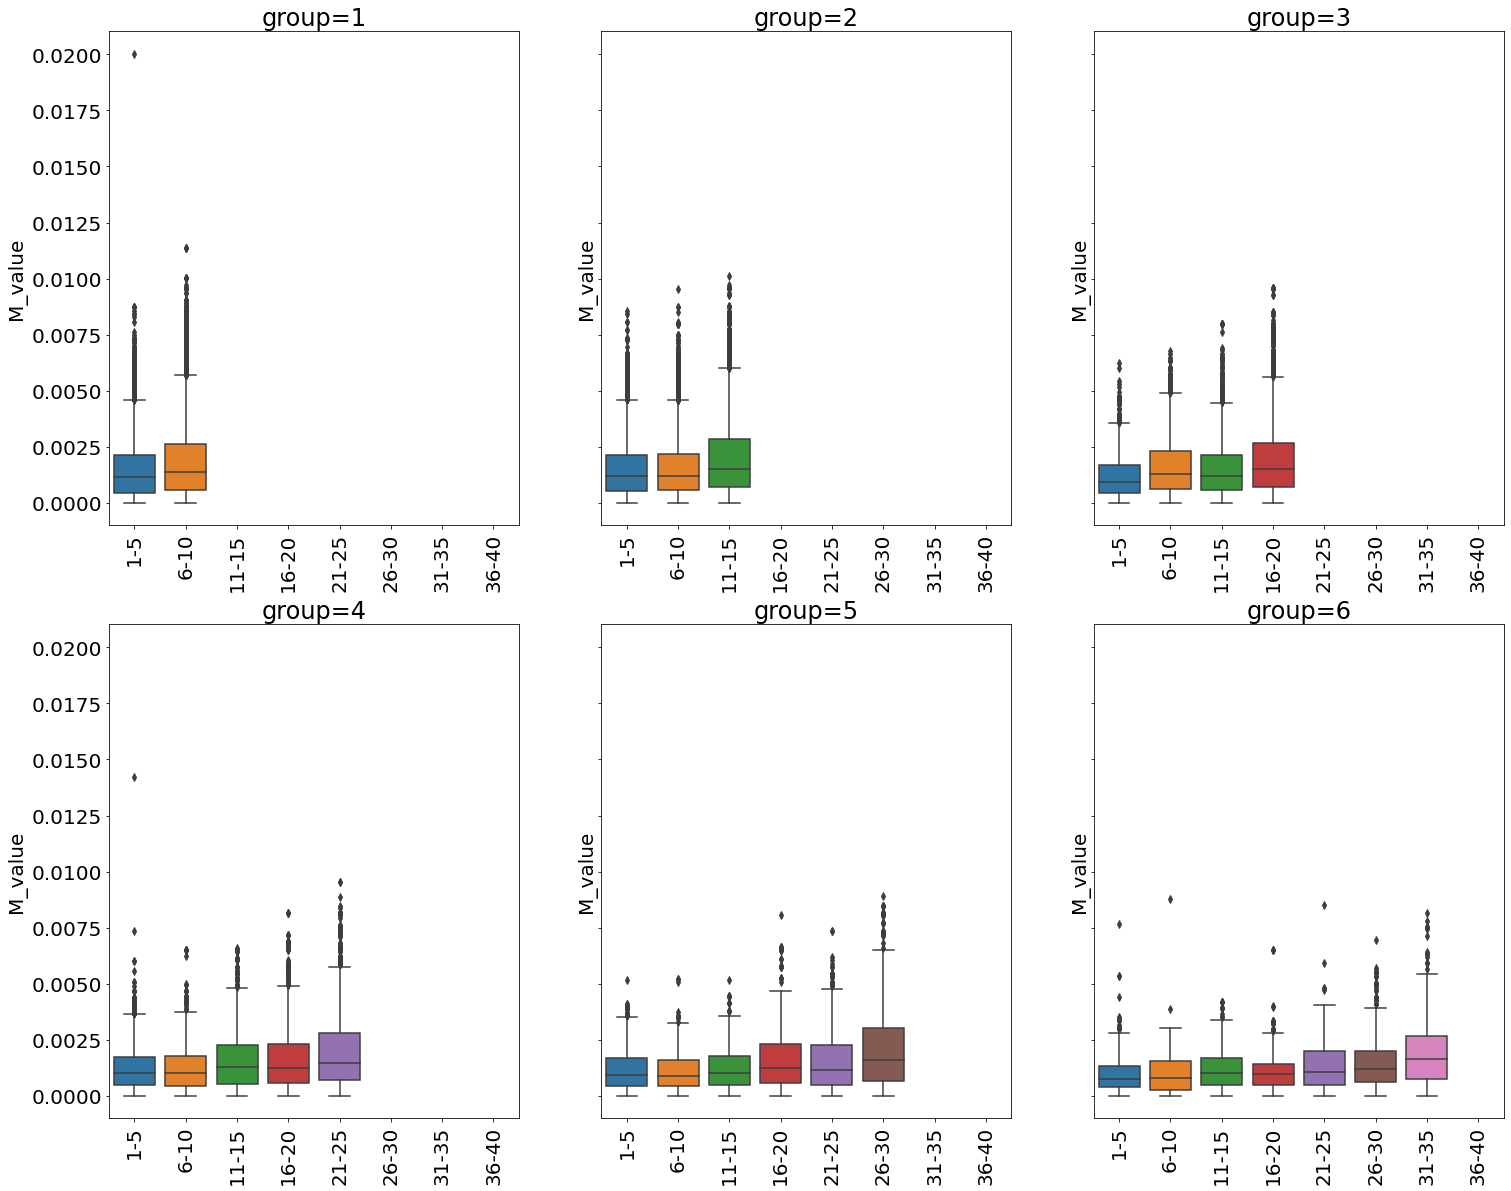

In [5]:
# M_value处理
def median(l):
    l = sorted(l)

    if len(l)%2 == 0:
        mid = (sorted(l)[int(len(l)/2)] + sorted(l)[int(len(l)/2)+1])/2
    else:
        mid = sorted(l)[int(len(l)/2)]
    return mid

def mode(l):
    l = sorted(l)
    return l[-1]

dic = {1:'1-5',2:'6-10',3:'11-15',4:'16-20',5:'21-25',6:'26-30',7:'31-35',8:'36-40'}
fig1,ax1 = plt.subplots(nrows=2, ncols=3, sharey=True, figsize=(25,20))
for i in range(1, 7):
    x1 = data_new[data_new['group1']==i].group2
    x2 = data_new[data_new['group1']==i].M_value
    sns.boxplot(x=x1.map(dic), y=x2, ax=ax1[(i-1)//3,i%3-1],order=['1-5','6-10','11-15','16-20','21-25','26-30','31-35','36-40'])
    ax1[(i-1)//3,i%3-1].set_title('group='+str(i))
    ax1[(i-1)//3,i%3-1].set_xlabel('')
    ax1[(i-1)//3,i%3-1].tick_params(axis='x', labelrotation= 90)
    
for m in range(1, 7):
    for n in range(1, 9):
        value = []
        mvalue = data_new[data_new['group1']==m]
        mvalue = mvalue[mvalue['group2']==n].M_value
        if len(mvalue)==0: continue
        value.append(median(mvalue))
        value.append(mvalue.mean())
        value.append(max(mvalue))
        value.append(min(mvalue))
        print("Group",str(m)," Period:",str(n),":中位数:",value[0],",均值:", value[1],\
                  "最大值",value[2],"最小值:",value[3])

                df    sum_sq   mean_sq          F        PR(>F)
C(group1)      9.0  0.000579  0.000064  42.325925  3.423692e-76
Residual   45561.0  0.069308  0.000002        NaN           NaN


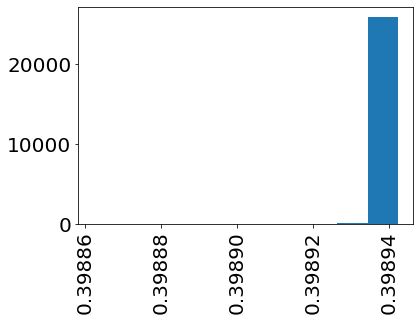

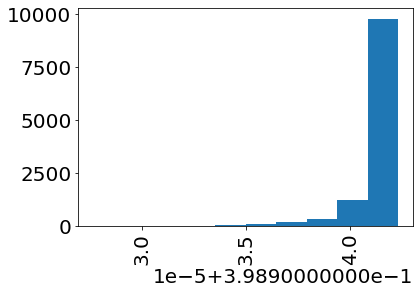

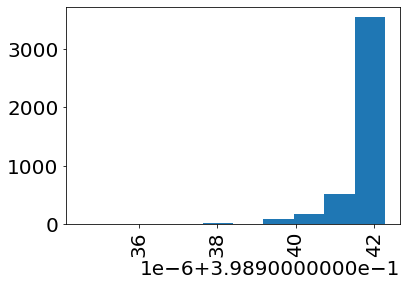

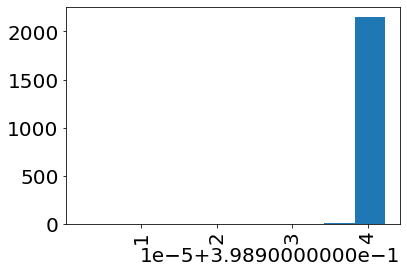

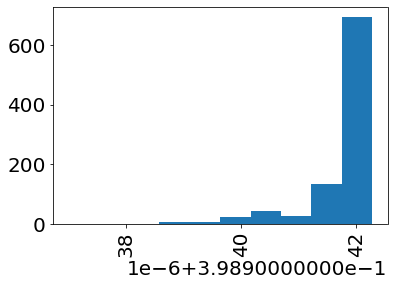

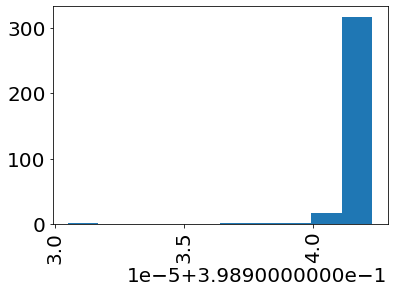

In [6]:
# 显著性差异检验
d1 = data_new[data_new['group2']==1].loc[:,['M_value','group1']]
model1 = ols('M_value ~ C(group1)', data=d1).fit()
anova1 = anova.anova_lm(model1)
print(anova1)

# 概率密度函数
M_pdfs =[]  #存储每组M_value的PDF
for i in range(1,7):
    d = d1[d1['group1']==i]
    M_pdfs.append(st.norm.pdf(d['M_value']))
M_pdfs = np.array(M_pdfs)
for i in range(len(M_pdfs)):
    plt.hist(M_pdfs[i])
    plt.xticks(rotation=90)
    plt.show()

# 3.E_value

In [7]:
# for m in range(1, 7):
#     mvalues = []
#     value = []
#     for n in range(1, 9):
#         value = []
#         mvalue = data_new[data_new['group1']==m]
#         mvalue = mvalue[mvalue['group2']==n].E_value
#         if len(mvalue)==0: continue
#         mvalues += mvalue.to_list()
#     if len(mvalues)==0: continue
#     mvalues = np.array(mvalues)
#     value.append(median(mvalues))
#     value.append(mvalues.mean())
#     value.append(max(mvalues))
#     value.append(min(mvalues))
#     print("Group",str(m)," Period:",str(n),":中位数:",value[0],",均值:", value[1],\
#                   "最大值",value[2],"最小值:",value[3])

AttributeError: 'DataFrame' object has no attribute 'E_value'

Group 1  Period: 1 :中位数: 0.0 ,均值: 0.37768354916402086 最大值 22.92204035 最小值: 0.0
Group 1  Period: 2 :中位数: 0.0 ,均值: 0.4092157937685736 最大值 22.8841418 最小值: 0.0
Group 2  Period: 1 :中位数: 0.0 ,均值: 0.3281207139463378 最大值 17.62826335 最小值: 0.0
Group 2  Period: 2 :中位数: 0.0 ,均值: 0.30333754378941474 最大值 10.45981712 最小值: 0.0
Group 2  Period: 3 :中位数: 0.0 ,均值: 0.34464053562262315 最大值 16.05544271 最小值: 0.0
Group 3  Period: 1 :中位数: 0.0 ,均值: 0.2536379235656019 最大值 8.725331757 最小值: 0.0
Group 3  Period: 2 :中位数: 0.0 ,均值: 0.24314507863768667 最大值 11.22796431 最小值: 0.0
Group 3  Period: 3 :中位数: 0.0 ,均值: 0.31118996633187285 最大值 14.91852242 最小值: 0.0
Group 3  Period: 4 :中位数: 0.0 ,均值: 0.35751672161319353 最大值 16.573939955 最小值: 0.0
Group 4  Period: 1 :中位数: 0.0 ,均值: 0.2470330658776391 最大值 8.894891534 最小值: 0.0
Group 4  Period: 2 :中位数: 0.0 ,均值: 0.26241224195571095 最大值 11.48953855 最小值: 0.0
Group 4  Period: 3 :中位数: 0.0 ,均值: 0.2339849531171136 最大值 7.485125769 最小值: 0.0
Group 4  Period: 4 :中位数: 0.0 ,均值: 0.28051926421756107 最大值

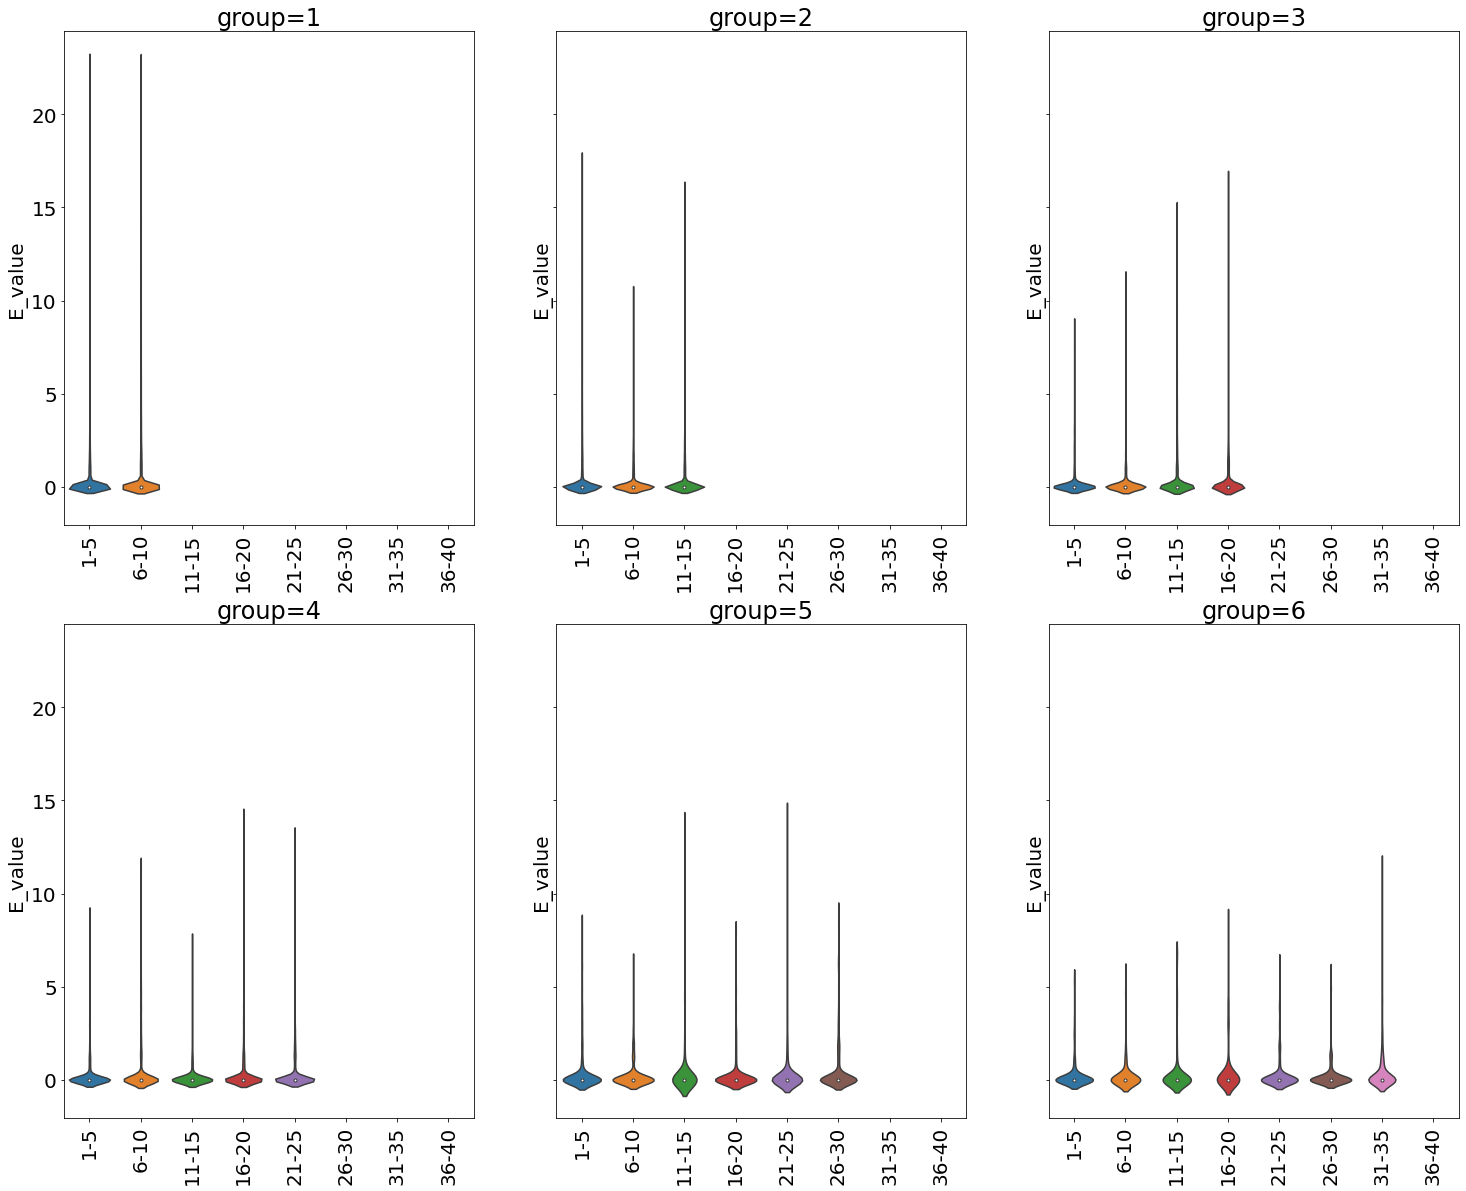

In [9]:
# 计算真正E_value
data_new['E_value'] = data_new['E_value1']*(1/data_new['E_value2'])

# E_value处理
fig2,ax2 = plt.subplots(nrows=2, ncols=3, sharey=True,figsize=(25,20))
for i in range(1, 7):
    x1 = data_new[data_new['group1']==i].group2
    x2 = data_new[data_new['group1']==i].E_value
    sns.violinplot(x=x1.map(dic), y=x2, ax=ax2[(i-1)//3,i%3-1],order=['1-5','6-10','11-15','16-20','21-25','26-30','31-35','36-40']) #boxplot显示不清楚，这里用了violinplot
    ax2[(i-1)//3,i%3-1].set_title('group='+str(i))
    ax2[(i-1)//3,i%3-1].set_xlabel('')
    ax2[(i-1)//3,i%3-1].tick_params(axis='x', labelrotation= 90)

    # 分析各阶段的数据 
for m in range(1, 7):
    for n in range(1, 9):
        value = []
        mvalue = data_new[data_new['group1']==m]
        mvalue = mvalue[mvalue['group2']==n].E_value
        if len(mvalue)==0: continue
        value.append(median(mvalue))
        value.append(mvalue.mean())
        value.append(max(mvalue))
        value.append(min(mvalue))
        print("Group",str(m)," Period:",str(n),":中位数:",value[0],",均值:", value[1],\
                  "最大值",value[2],"最小值:",value[3])

# 只分析整体的数据
# for m in range(1, 7):
#     mvalues = []
#     value = []
#     for n in range(1, 9):
#         value = []
#         mvalue = data_new[data_new['group1']==m]
#         mvalue = mvalue[mvalue['group2']==n].E_value
#         if len(mvalue)==0: continue
#         mvalues += mvalue.to_list()
#     if len(mvalues)==0: continue
#     mvalues = np.array(mvalues)
#     value.append(median(mvalues))
#     value.append(mvalues.mean())
#     value.append(max(mvalues))
#     value.append(min(mvalues))
#     print("Group",str(m)," Period:",str(n),":中位数:",value[0],",均值:", value[1],\
#                   "最大值",value[2],"最小值:",value[3])

                df        sum_sq    mean_sq         F        PR(>F)
C(group1)      9.0     97.178692  10.797632  8.003312  6.224717e-12
Residual   45561.0  61468.416397   1.349145       NaN           NaN


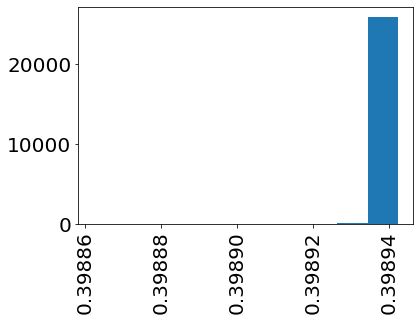

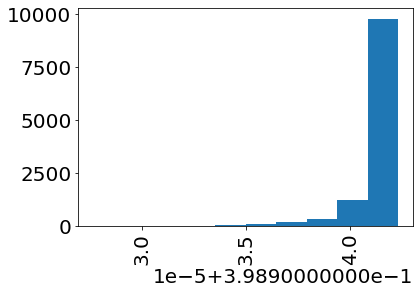

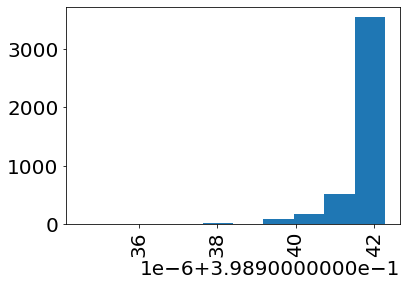

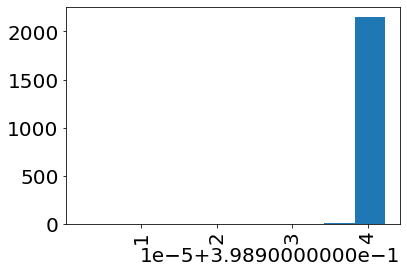

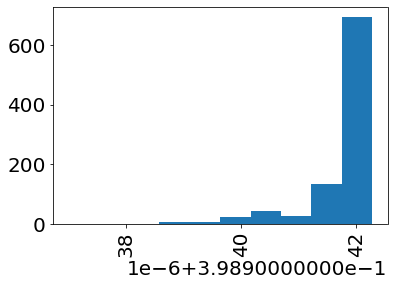

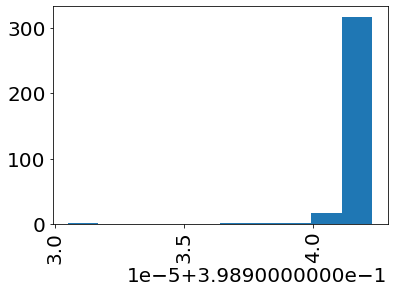

In [10]:
# 显著性差异检验
d2 = data_new[data_new['group2']==1].loc[:,['E_value','group1']]
model2 = ols('E_value ~ C(group1)', data=d2).fit()
anova2 = anova.anova_lm(model2)
print(anova2)

# 概率密度函数
E_pdfs =[]  #存储每组E_value的PDF
for i in range(1,7):
    d = d1[d1['group1']==i]
    E_pdfs.append(st.norm.pdf(d['M_value']))
    
E_pdfs = np.array(E_pdfs)
for i in range(len(E_pdfs)):
    plt.hist(E_pdfs[i])
    plt.xticks(rotation=90)
    plt.show()

# 4.Stage

In [11]:
# 计算每个阶段的rank
def rank(r,l):
    if r<= 0.2*l: return 1
    elif r<= 0.4*l: return 2
    elif r<= 0.6*l: return 3
    elif r<=0.8*l: return 4
    else: return 5
    
for i in range(1,9):
    stage = data_new[data_new['group2']==i].groupby(['name'])['E_value'].sum().sort_values()
    d = dict()
    l = len(stage)
    c = 1
    for j in stage.index:
        r = rank(c,l)
        d[j]=r
        c += 1
    col = 's'+str(i)
    data_new[col] = data_new['name'].map(d)

# 没有的用0填充
data_new = data_new.fillna(0)

In [12]:
# E_value:作者真实E_value
# s1-s8: 该作者每个阶段的stage
data_new.head()

,name,year,M_value,E_value1,E_value2,min,max,age,gap,group1,group2,E_value,s1,s2,s3,s4,s5,s6,s7,s8
2,Chih-cheng Lin,2009,0.000000,0.0,3,2009.0,2014.0,6.0,1.0,1.0,1.0,0.0,4,4.0,0.0,0.0,0.0,0.0,0.0,0.0
5,Chih-cheng Lin,2009,0.000000,0.0,3,2009.0,2014.0,6.0,1.0,1.0,1.0,0.0,4,4.0,0.0,0.0,0.0,0.0,0.0,0.0
8,Chih-cheng Lin,2009,0.000000,0.0,3,2009.0,2014.0,6.0,1.0,1.0,1.0,0.0,4,4.0,0.0,0.0,0.0,0.0,0.0,0.0
9,Siddharth Patwardhan,2012,0.000336,0.0,1,2004.0,2017.0,14.0,9.0,2.0,2.0,0.0,3,3.0,2.0,0.0,0.0,0.0,0.0,0.0
10,Branimir Boguraev,2012,0.000336,0.0,2,1996.0,2017.0,22.0,17.0,4.0,4.0,0.0,4,3.0,3.0,4.0,3.0,0.0,0.0,0.0


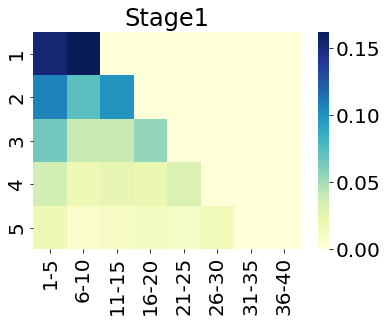

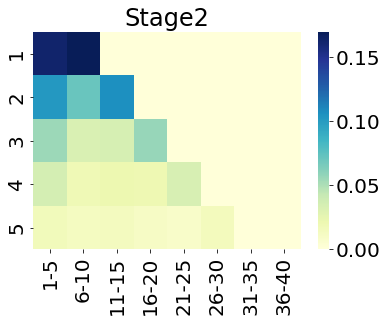

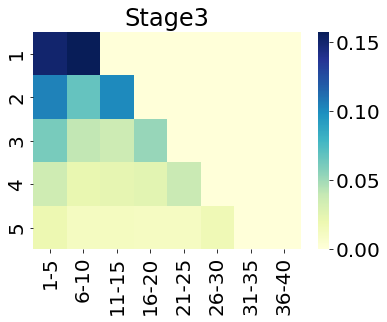

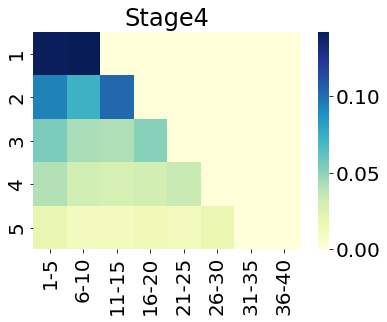

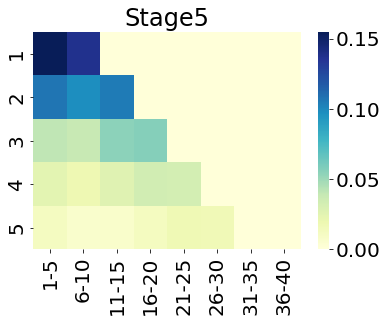

In [13]:
#概率分布热力图
# fig3, ax3 = plt.subplots(nrows=1,ncols=6)
for s in range(1,6):
    # stage1-5
    y = [1,2,3,4,5]
    x = ['1-5','6-10','11-15','16-20','21-25','26-30','31-35','36-40']
    temp = []
    for i in range(1,6):
        # 计算各组stage的概率
        t = []
        for j in range(1,9):
            # 计算各组不同阶段stage的概率
            c = 's'+str(j)
            t.append(data_new[data_new['group1']==i][c].to_list().count(s))
        temp.append(t)
    temp = np.array(temp)
    temp = np.divide(temp, temp.sum())
    temp = pd.DataFrame(columns=x, index=y,data=temp)
    plt.title('Stage'+str(s))
    sns.heatmap(temp, cmap='YlGnBu')
    plt.show()

In [14]:
#Stage显著性检验
cols = ['s1','s2','s3','s4','s5','s6','s7','s8']
kt= chi2_contingency(data_new.loc[:,cols])
print('卡方值=%.4f, p值=%.4f, 自由度=%i expected_frep=%s'%kt)

卡方值=1485744.1345, p值=0.0000, 自由度=826700 expected_frep=[[2.74933674 2.31107136 1.44363558 ... 0.19627822 0.0738619  0.02109585]
 [2.74933674 2.31107136 1.44363558 ... 0.19627822 0.0738619  0.02109585]
 [2.74933674 2.31107136 1.44363558 ... 0.19627822 0.0738619  0.02109585]
 ...
 [5.84234058 4.91102664 3.06772561 ... 0.41709123 0.15695654 0.04482869]
 [4.8113393  4.04437488 2.52636227 ... 0.34348689 0.12925832 0.03691774]
 [3.43667093 2.8888392  1.80454448 ... 0.24534778 0.09232737 0.02636982]]


# 6.相关与回归分析

In [15]:
# 计算各阶段E_value之和
d = data_new.groupby(['group2','name'])['E_value'].sum()
d = pd.DataFrame(d)
data_new = data_new.merge(d,how='left',on=['group2','name'])
data_new = data_new.rename(columns={'E_value_x':'E_value','E_value_y':'Sum_E'})

# Sum_E:该作者在当前阶段E_value的和
data_new.head()

,name,year,M_value,E_value1,E_value2,min,max,age,gap,group1,...,E_value,s1,s2,s3,s4,s5,s6,s7,s8,Sum_E
0,Chih-cheng Lin,2009,0.000000,0.0,3,2009.0,2014.0,6.0,1.0,1.0,...,0.0,4,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Chih-cheng Lin,2009,0.000000,0.0,3,2009.0,2014.0,6.0,1.0,1.0,...,0.0,4,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Chih-cheng Lin,2009,0.000000,0.0,3,2009.0,2014.0,6.0,1.0,1.0,...,0.0,4,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Siddharth Patwardhan,2012,0.000336,0.0,1,2004.0,2017.0,14.0,9.0,2.0,...,0.0,3,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Branimir Boguraev,2012,0.000336,0.0,2,1996.0,2017.0,22.0,17.0,4.0,...,0.0,4,3.0,3.0,4.0,3.0,0.0,0.0,0.0,0.0


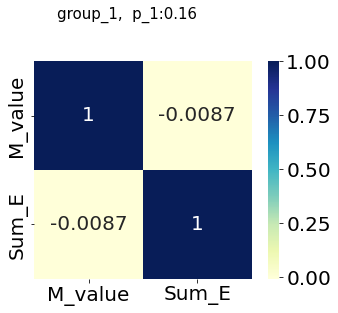

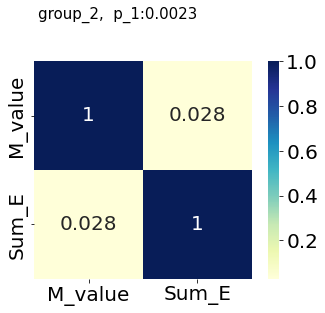

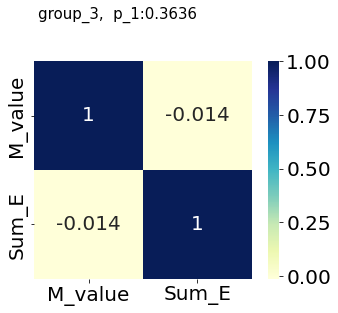

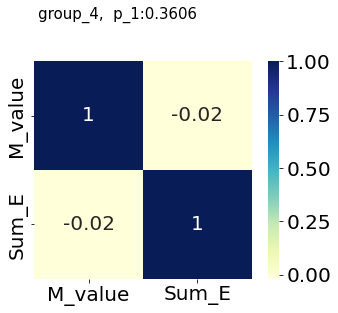

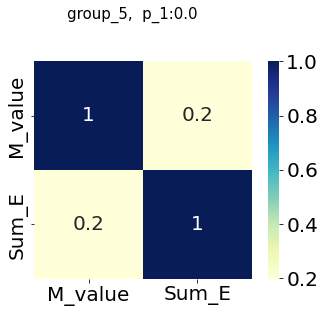

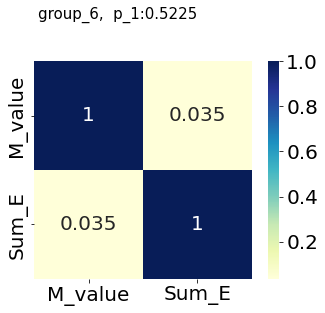

In [16]:
# 计算各组人员在[1,5]阶段的M_value与各阶段E_value之和的相关性，画热力图。
for i in range(1,7):
    mvalue = data_new[data_new['group1']==i]
    mvalue = mvalue[mvalue['group2']==1]
    r,p = stats.pearsonr(mvalue.M_value, mvalue.Sum_E)
    p = round(p,4)
    s = "group_"+str(i)+",  p_1:"+str(p)
    plt.text(1.5,-0.5,s,fontsize=15,verticalalignment="top",horizontalalignment="right")
    sns.heatmap(mvalue.loc[:,['M_value', 'Sum_E']].corr(), cmap='YlGnBu',square=True, annot=True)
    plt.show()

In [17]:
# 用线性回归分析M_value与各阶段E_value之和的回归关系
model3=ols('M_value~Sum_E',data=data_new).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                M_value   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     71.54
Date:                Wed, 11 May 2022   Prob (F-statistic):           2.74e-17
Time:                        12:10:34   Log-Likelihood:             6.0719e+05
No. Observations:              118101   AIC:                        -1.214e+06
Df Residuals:                  118099   BIC:                        -1.214e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0016   4.33e-06    370.438      0.000       0.002       0.002
Sum_E       4.783e-06   5.65e-07      8.458      0.000    3.67e-06    5.89e-06
==============================================================================
Omnibus:                    31894.141   Durbin-Watson:                   0.701
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            83668.701
Skew:                           1.465   Prob(JB):                         0.00
Kurtosis:                       5.901   Cond. No.                         8.04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

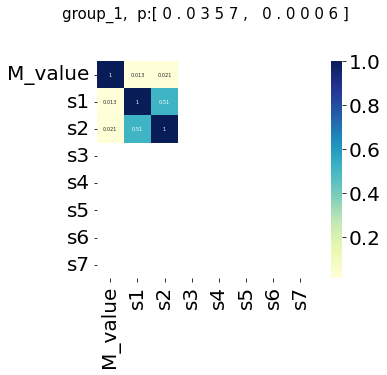

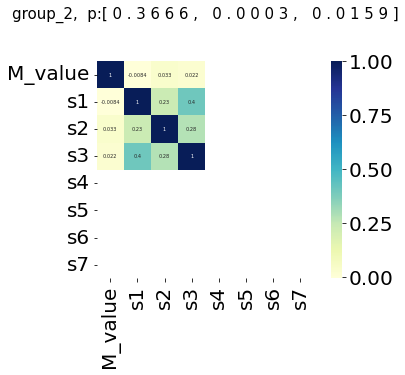

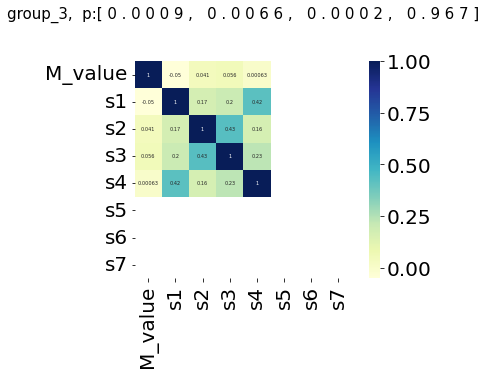

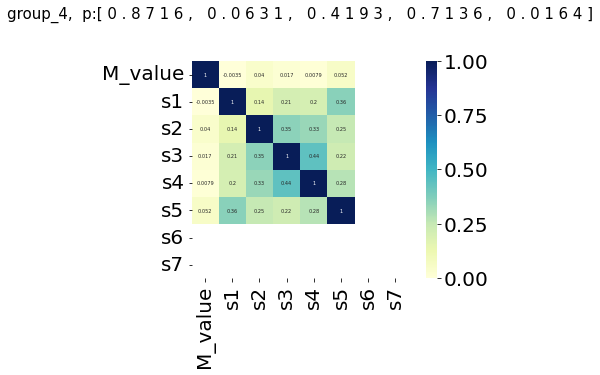

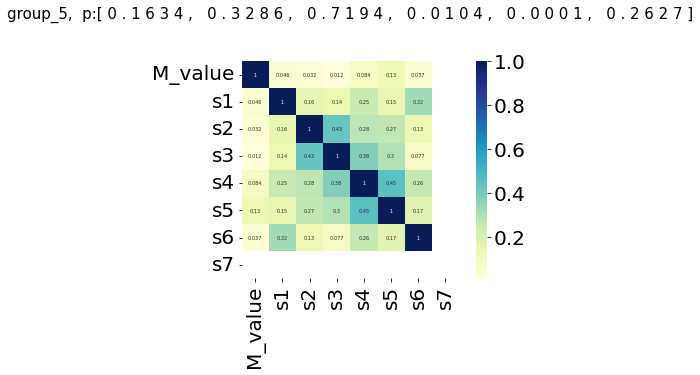

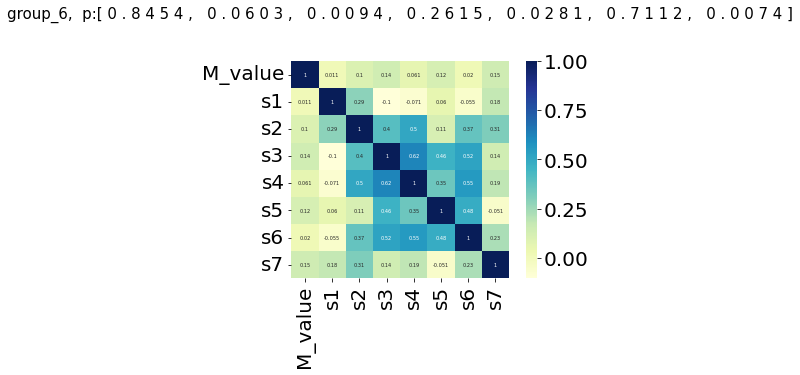

In [21]:
# 计算各组人员在[1,5]阶段的M_value与各阶段stage的相关性，画热力图。
for i in range(1,7):
    cols = ['M_value','s1','s2','s3','s4','s5','s6','s7']
    mvalue = data_new[data_new['group1']==i]
    mvalue = mvalue[mvalue['group2']==1]
    
    ps = []
    for j in range(1,i+2):
        c = 's'+str(j)
        r,p = stats.spearmanr(mvalue.M_value, mvalue.loc[:,c])
        ps.append(round(p,4))
    s = "group_"+str(i)+",  p:"+' '.join(str(ps))
    plt.text(4,-2,s,fontsize=15,verticalalignment="top",horizontalalignment="center")
    sns.heatmap(mvalue.loc[:,cols].corr(method='spearman'), cmap='YlGnBu',square=True, annot=True,annot_kws={'size':5})
    plt.show()

In [19]:
# 用有序logistic回归分析M_value与各阶段stage的回归关系。
cols = ['s1','s2','s3','s4','s5','s6','s7','s8']
logit = sm.Logit(data_new['M_value'], data_new.loc[:,cols]).fit()
logit.summary()

Optimization terminated successfully.
         Current function value: 0.004924
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                M_value   No. Observations:               118101
Model:                          Logit   Df Residuals:                   118093
Method:                           MLE   Df Model:                            7
Date:                Wed, 11 May 2022   Pseudo R-squ.:                     inf
Time:                        12:10:46   Log-Likelihood:                -581.58
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
s1            -2.8412      0.067    -42.323      0.000      -2.973      -2.710
s2            -0.4858      0.052     -9.413      0.000      -0.587      -0.385
s3            -0.2482      0.045     -5.540      0.000      -0.336      -0.160
s4            -0.2153      0.054     -3.951      0.000      -0.322      -0.108
s5            -0.1196      0.073     -1.637      0.102      -0.263       0.024
s6            -0.2398      0.109     -2.205      0.027      -0.453      -0.027
s7            -0.0796      0.178     -0.447      0.655      -0.428       0.269
s8            -0.0977      0.336     -0.291      0.771      -0.755       0.560
==============================================================================
"""

Optimization terminated successfully.
         Current function value: 0.004979
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:                M_value   No. Observations:               118101
Model:                          Logit   Df Residuals:                   118100
Method:                           MLE   Df Model:                            0
Date:                Wed, 11 May 2022   Pseudo R-squ.:                     inf
Time:                        12:10:55   Log-Likelihood:                -588.00
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
s1            -3.6961      0.041    -90.882      0.000      -3.776      -3.616


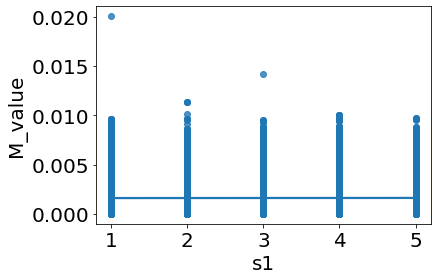

Optimization terminated successfully.
         Current function value: 0.125876
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:                M_value   No. Observations:               118101
Model:                          Logit   Df Residuals:                   118100
Method:                           MLE   Df Model:                            0
Date:                Wed, 11 May 2022   Pseudo R-squ.:                     inf
Time:                        12:11:01   Log-Likelihood:                -14866.
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
s2            -3.6202      0.044    -82.150      0.000      -3.707      -3.534


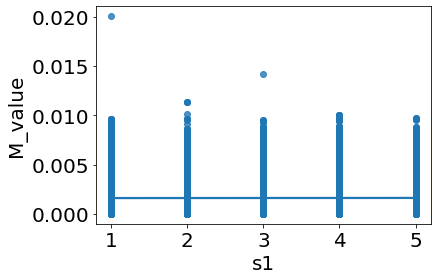

Optimization terminated successfully.
         Current function value: 0.344900
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:                M_value   No. Observations:               118101
Model:                          Logit   Df Residuals:                   118100
Method:                           MLE   Df Model:                            0
Date:                Wed, 11 May 2022   Pseudo R-squ.:                     inf
Time:                        12:11:07   Log-Likelihood:                -40733.
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
s3            -3.5558      0.056    -64.055      0.000      -3.665      -3.447


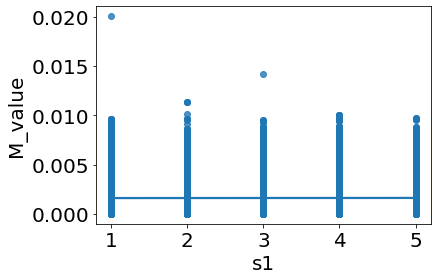

Optimization terminated successfully.
         Current function value: 0.505615
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:                M_value   No. Observations:               118101
Model:                          Logit   Df Residuals:                   118100
Method:                           MLE   Df Model:                            0
Date:                Wed, 11 May 2022   Pseudo R-squ.:                     inf
Time:                        12:11:14   Log-Likelihood:                -59714.
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
s4            -3.5765      0.077    -46.717      0.000      -3.727      -3.426


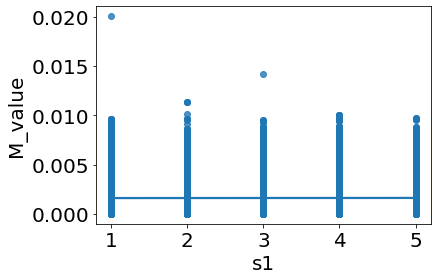

Optimization terminated successfully.
         Current function value: 0.593218
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:                M_value   No. Observations:               118101
Model:                          Logit   Df Residuals:                   118100
Method:                           MLE   Df Model:                            0
Date:                Wed, 11 May 2022   Pseudo R-squ.:                     inf
Time:                        12:11:20   Log-Likelihood:                -70060.
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
s5            -3.4857      0.105    -33.269      0.000      -3.691      -3.280


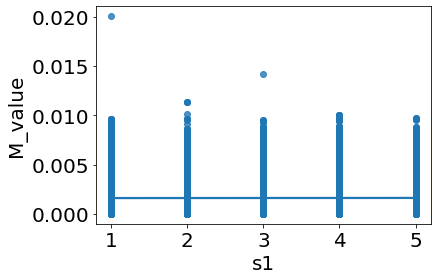

Optimization terminated successfully.
         Current function value: 0.646628
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:                M_value   No. Observations:               118101
Model:                          Logit   Df Residuals:                   118100
Method:                           MLE   Df Model:                            0
Date:                Wed, 11 May 2022   Pseudo R-squ.:                     inf
Time:                        12:11:26   Log-Likelihood:                -76367.
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
s6            -3.5145      0.157    -22.395      0.000      -3.822      -3.207


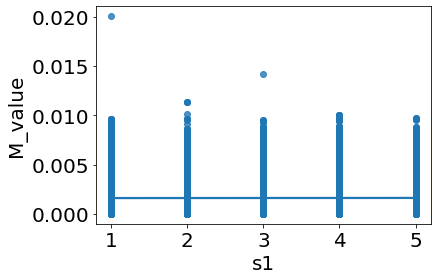

Optimization terminated successfully.
         Current function value: 0.675686
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:                M_value   No. Observations:               118101
Model:                          Logit   Df Residuals:                   118100
Method:                           MLE   Df Model:                            0
Date:                Wed, 11 May 2022   Pseudo R-squ.:                     inf
Time:                        12:11:33   Log-Likelihood:                -79799.
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
s7            -3.6401      0.264    -13.791      0.000      -4.157      -3.123


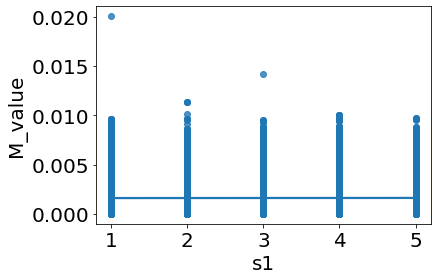

Optimization terminated successfully.
         Current function value: 0.688275
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:                M_value   No. Observations:               118101
Model:                          Logit   Df Residuals:                   118100
Method:                           MLE   Df Model:                            0
Date:                Wed, 11 May 2022   Pseudo R-squ.:                     inf
Time:                        12:11:39   Log-Likelihood:                -81286.
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
s8            -3.7081      0.492     -7.539      0.000      -4.672      -2.744


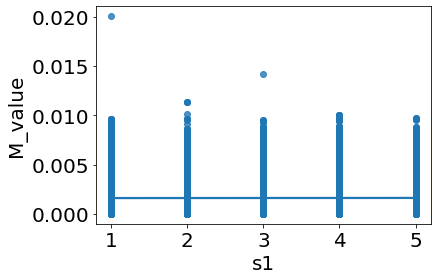

In [20]:
for i in ['s1','s2','s3','s4','s5','s6','s7','s8']:
    logit = sm.Logit(data_new['M_value'], data_new.loc[:,i]).fit()
    print(logit.summary())
    sns.regplot(x='s1',y='M_value',data = data_new)
    plt.show()